In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from profiling.funs import load, numf_ls, batch_ls, hp_map

In [2]:
def corr(df, feat, title):
    plt.scatter(df[feat], df['total_ms'])
    plt.title(title, fontsize=14)
    plt.xlabel(feat, fontsize=14)
    plt.ylabel('total_ms', fontsize=14)
    plt.grid(True)
    plt.show()

def plot_numf(df_big, layer):
    df = df_big[df_big['model_str']==layer]
    for nodes in [1,2,3]:
        for batch in batch_ls:
            for hp in hp_map[layer]:
                mask = (df['batch']==batch) & (df['hp']==hp) & (df['nodes']==nodes)
                title = '{}, nodes: {}, batch: {}, hp: {}'.format(layer, nodes, batch, hp)
                
                corr(df[mask], 'numf', title)


def plot_batch(df_big, layer):
    df = df_big[df_big['model_str']==layer]
    for nodes in [1,2,3]:
        for numf in numf_ls:
            for hp in hp_map[layer]:
                mask = (df.nodes==nodes)&(df.numf==numf)&(df.hp==hp)
                title = '{}, nodes: {}, numf: {}, hp: {}'.format(layer, nodes, numf, hp)
                
                corr(df[mask], 'batch', title)                

def plot_nodes(df_big, layer):
    df = df_big[df_big['model_str']==layer]
    for numf in numf_ls:
        for batch in batch_ls:
            for hp in hp_map[layer]:
                mask = (df.numf==numf)&(df.batch==batch)&(df.hp==hp)
                title = '{}, numf: {}, batch: {}, hp: {}'.format(layer, numf, batch, hp)
                
                corr(df[mask], 'nodes', title)

def plot_hp(df_big, layer):
    df = df_big[df_big['model_str']==layer]
    for nodes in [1,2,3]:
        for numf in numf_ls:
            for batch in batch_ls:
                mask = (df.nodes==nodes)&(df.numf==numf)&(df.batch==batch)
                title = '{}, nodes: {}, numf: {}, batch: {}'.format(layer, nodes, numf, batch)
                
                corr(df[mask], 'hp', title)
    
def plot(df, layer, feat):
    mask = df['model_str']==layer
    title = '{}, {}'.format(layer, feat)
    corr(df[mask], feat, title)

In [3]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
def give_train_data(df, layer):
    mask = df['model_str'] == layer
    df_ = df[mask].drop(columns='model_str')
    
    return df_.drop(columns='total_ms').to_numpy(), df_.total_ms.to_numpy()

def the_train(df, model, layer):
    x,y = give_train_data(df, layer)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print('Model: {}, Layer: {}, Score: {}'.format(model, layer, score))
    print()
    
    return model

In [5]:
layers = ['conv1d', 'conv2d', 'avg1d', 'avg2d', 'max1d', 'max2d', 'dense', 'norm1d', 'norm2d']

In [6]:
models = {
    'linear': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'elastic': ElasticNet(),
    'kneighbors': KNeighborsRegressor(),
    'tree': DecisionTreeRegressor(),
    'svr': SVR(),
    'forest': RandomForestRegressor(),
}

In [7]:
def _all(df):
    for key in models:
        for layer in layers:
            the_train(df, models[key], layer)
        print('---')
        print()

In [8]:
file = 'datasets/total_{}.{}'.format

In [9]:
big_file = 'datasets/big_total_{}.{}'.format

In [10]:
tf = pd.concat([load(file(num, 'tflow')) for num in [1,2,3]], ignore_index=True)

_all(tf)

Model: LinearRegression(), Layer: conv1d, Score: 0.7772487941059837

Model: LinearRegression(), Layer: conv2d, Score: 0.7839840267344762

Model: LinearRegression(), Layer: avg1d, Score: 0.7574135524549175

Model: LinearRegression(), Layer: avg2d, Score: 0.8732096143059664

Model: LinearRegression(), Layer: max1d, Score: 0.7825804134737229

Model: LinearRegression(), Layer: max2d, Score: 0.8551001651697762

Model: LinearRegression(), Layer: dense, Score: 0.43654498673357434

Model: LinearRegression(), Layer: norm1d, Score: 0.7828810710234306

Model: LinearRegression(), Layer: norm2d, Score: 0.8744675432824315

---

Model: Ridge(), Layer: conv1d, Score: 0.756847358004004

Model: Ridge(), Layer: conv2d, Score: 0.7750954669402718

Model: Ridge(), Layer: avg1d, Score: 0.04053371894419877

Model: Ridge(), Layer: avg2d, Score: 0.8834048033129278

Model: Ridge(), Layer: max1d, Score: 0.7554949248542873

Model: Ridge(), Layer: max2d, Score: 0.8855865549849123

Model: Ridge(), Layer: dense, Scor

In [11]:
tor = pd.concat([load(file(num, 'torch')) for num in [1,2,3]], ignore_index=True)

_all(tor)

Model: LinearRegression(), Layer: conv1d, Score: 0.3387087583807057

Model: LinearRegression(), Layer: conv2d, Score: 0.6175166185879135

Model: LinearRegression(), Layer: avg1d, Score: 0.27309818697679333

Model: LinearRegression(), Layer: avg2d, Score: 0.607886958324281

Model: LinearRegression(), Layer: max1d, Score: 0.6377647304952963

Model: LinearRegression(), Layer: max2d, Score: 0.47356573154212356

Model: LinearRegression(), Layer: dense, Score: 0.714647795738949

Model: LinearRegression(), Layer: norm1d, Score: 0.12489961455775234

Model: LinearRegression(), Layer: norm2d, Score: 0.6109827241670107

---

Model: Ridge(), Layer: conv1d, Score: 0.44319123388085147

Model: Ridge(), Layer: conv2d, Score: 0.5566129210437853

Model: Ridge(), Layer: avg1d, Score: 0.35995188359708064

Model: Ridge(), Layer: avg2d, Score: 0.4980966004349069

Model: Ridge(), Layer: max1d, Score: 0.650505008300308

Model: Ridge(), Layer: max2d, Score: 0.46055225612255934

Model: Ridge(), Layer: dense, Sc

In [12]:
tor=load(file(1, 'torch'))

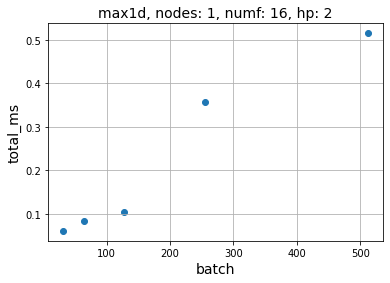

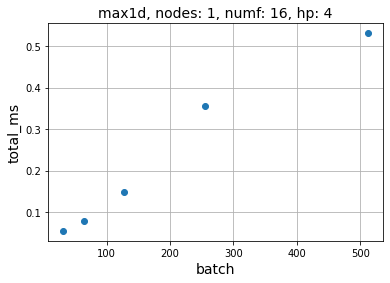

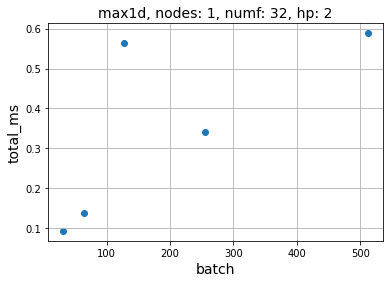

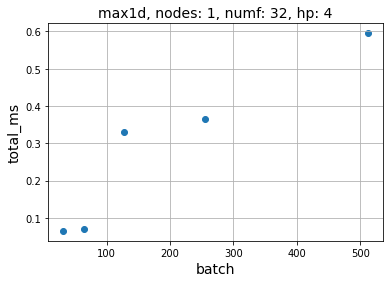

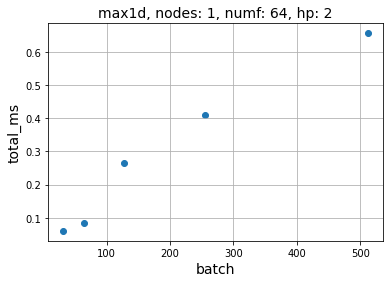

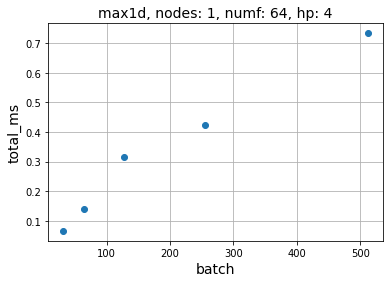

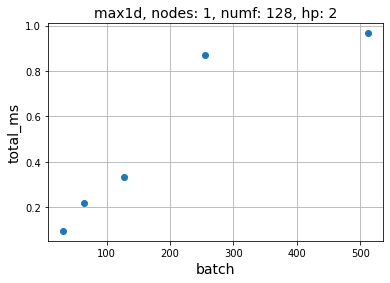

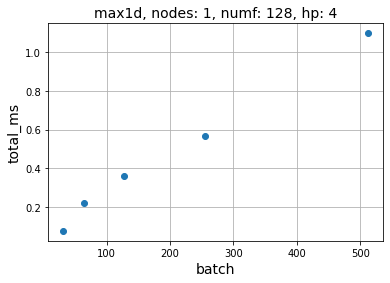

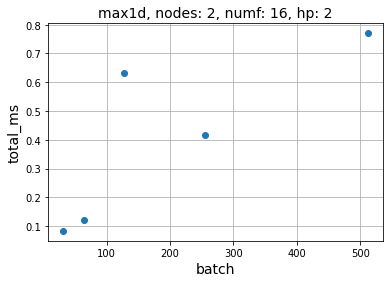

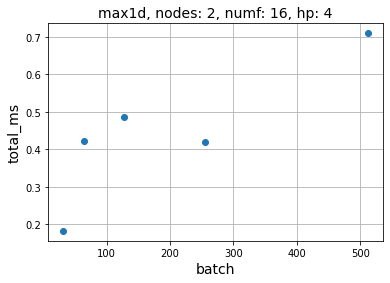

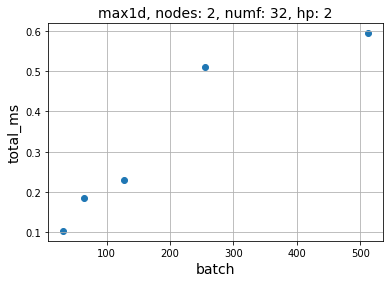

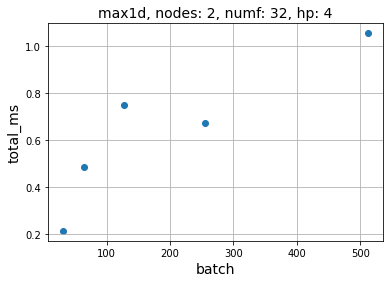

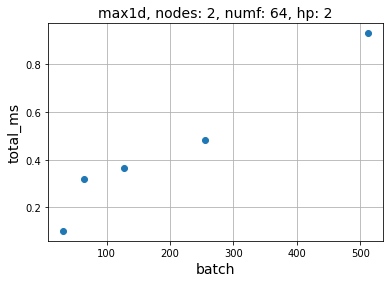

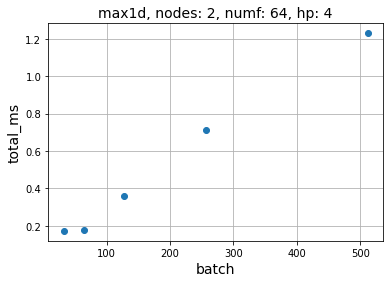

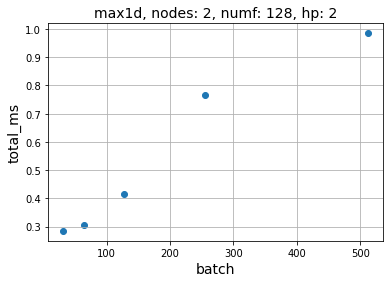

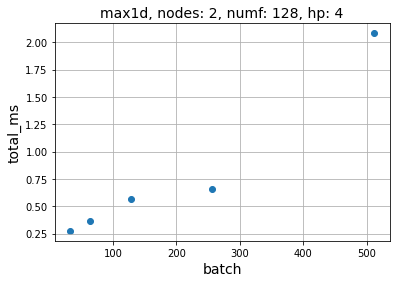

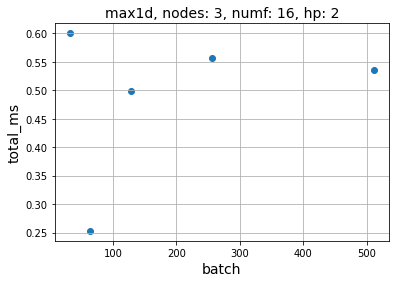

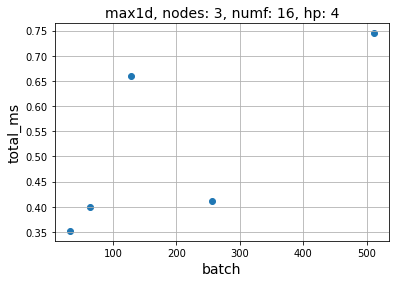

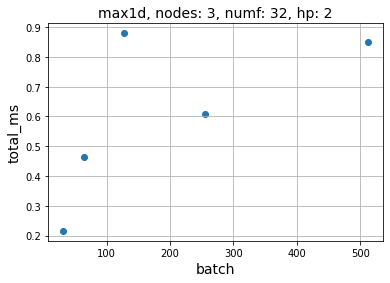

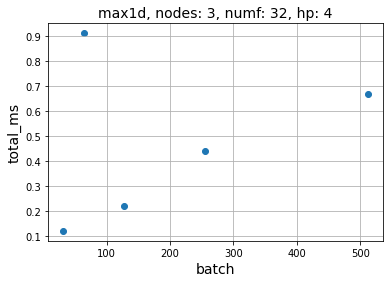

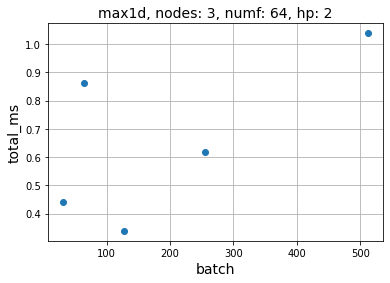

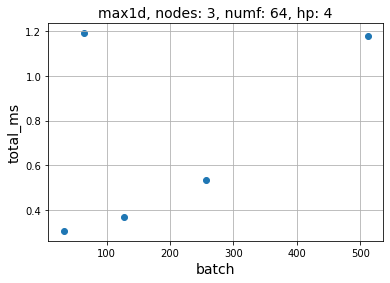

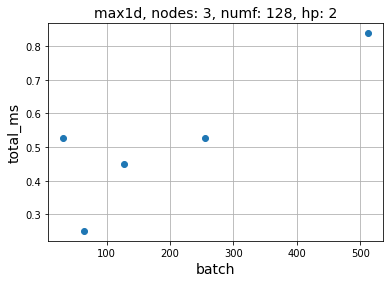

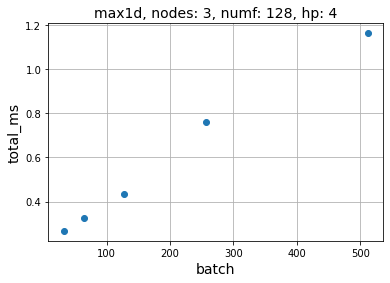

In [13]:
plot_batch(tor, 'max1d')

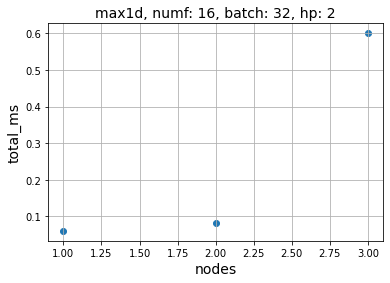

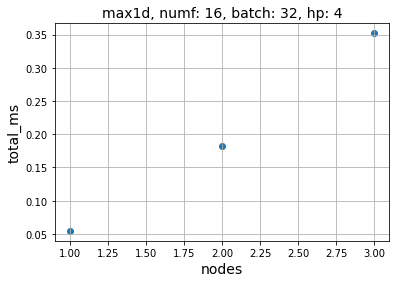

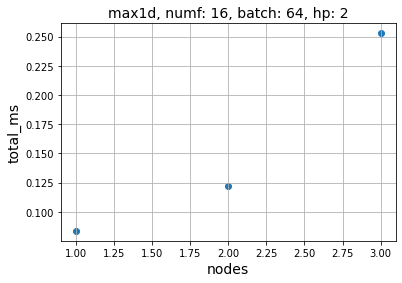

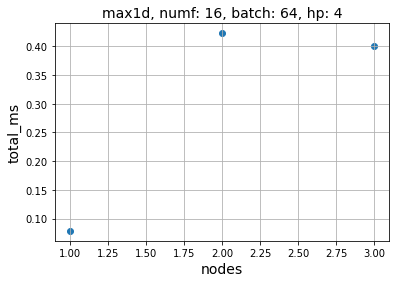

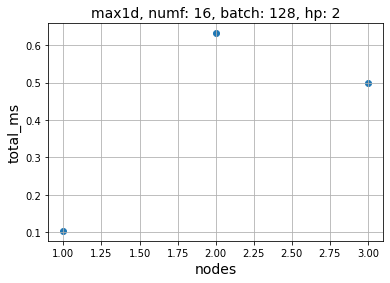

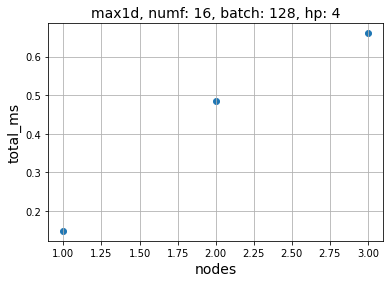

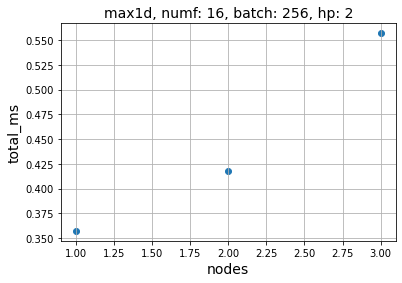

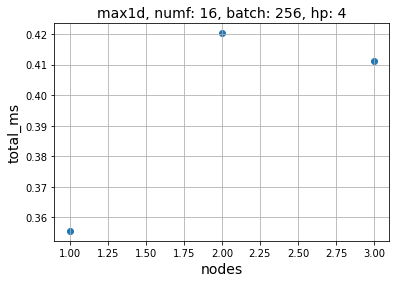

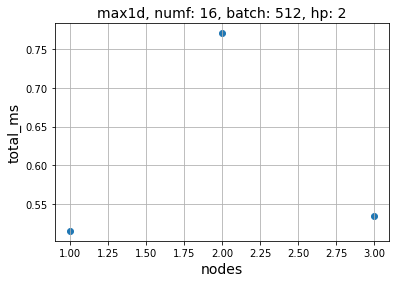

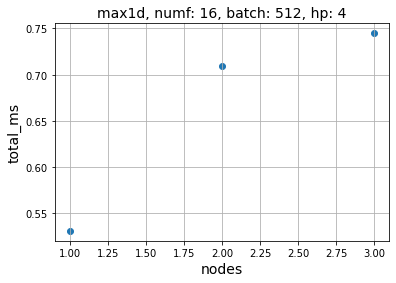

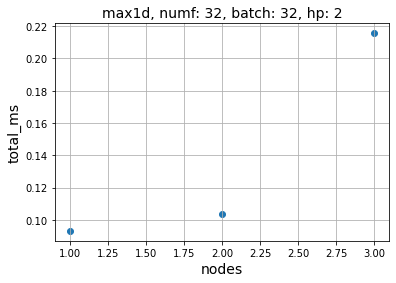

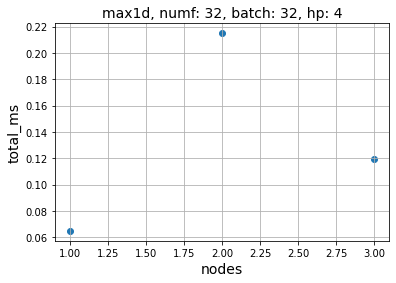

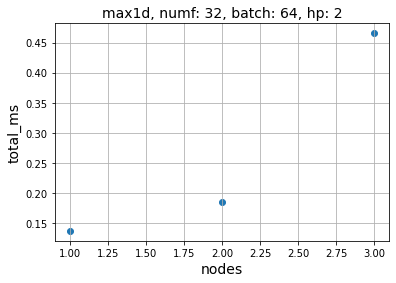

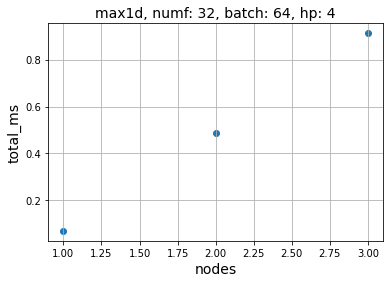

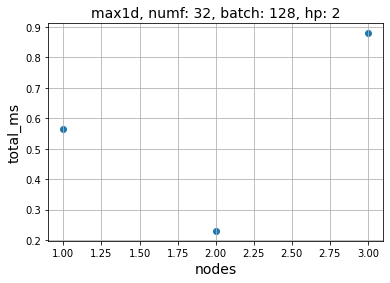

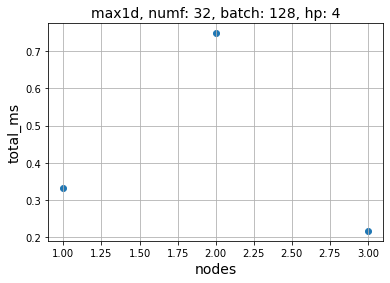

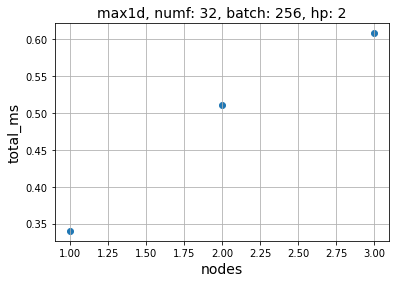

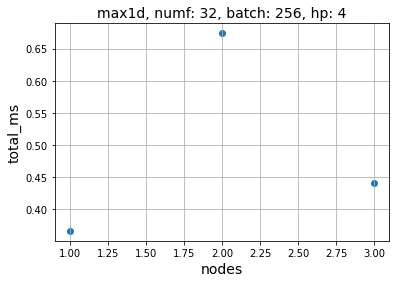

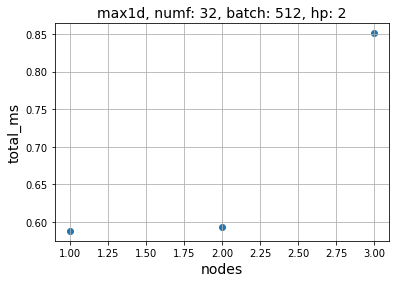

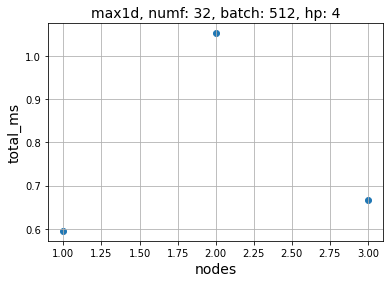

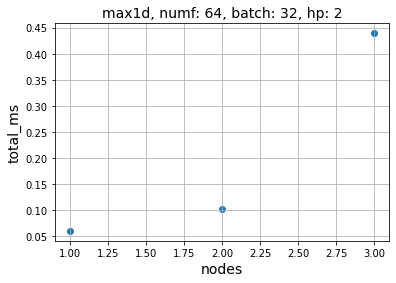

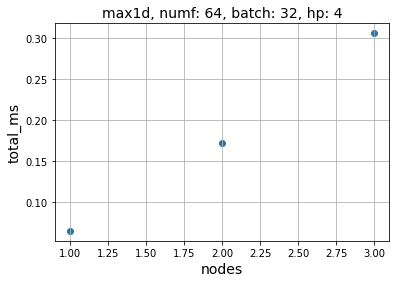

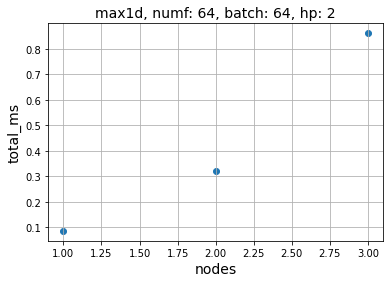

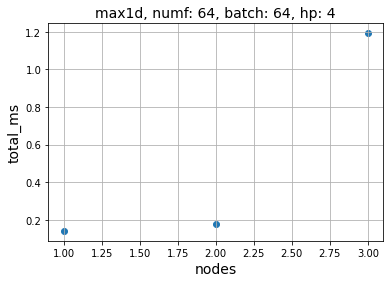

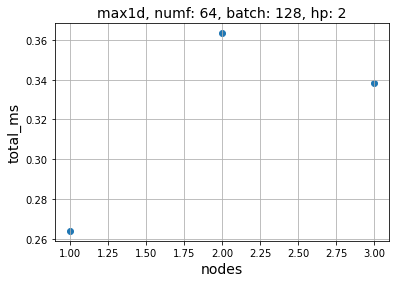

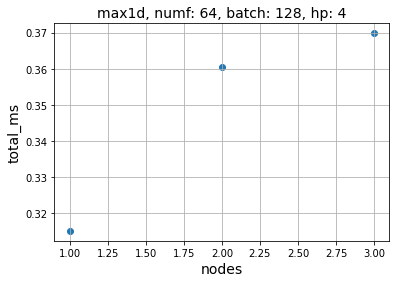

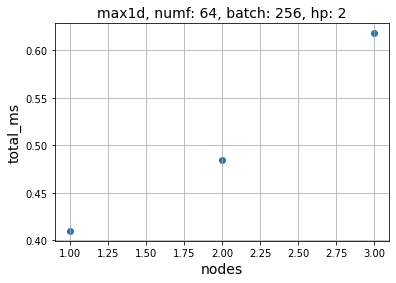

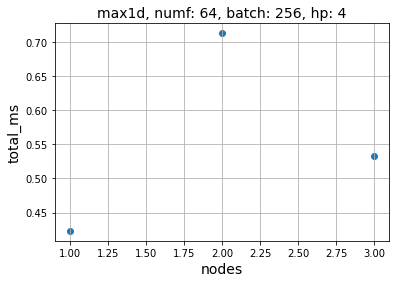

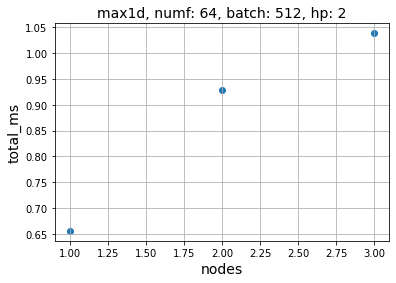

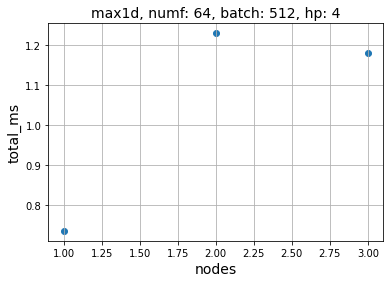

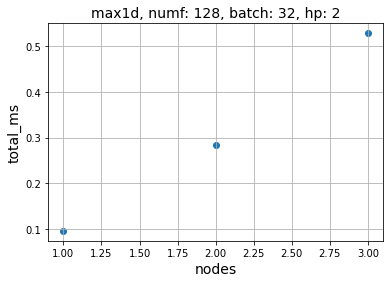

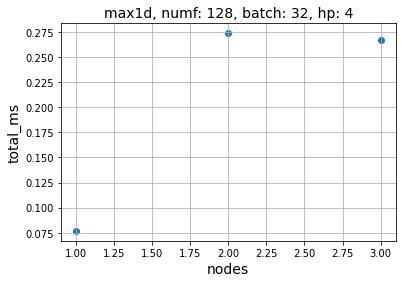

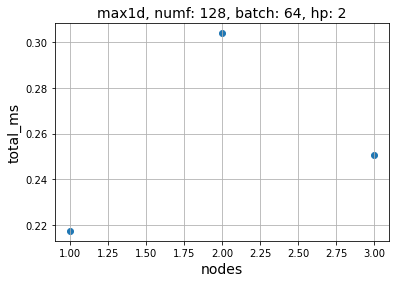

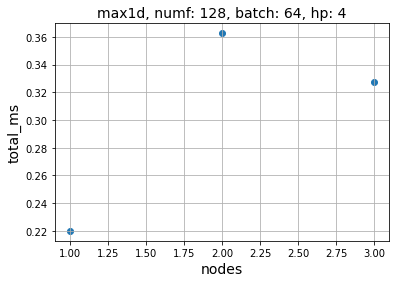

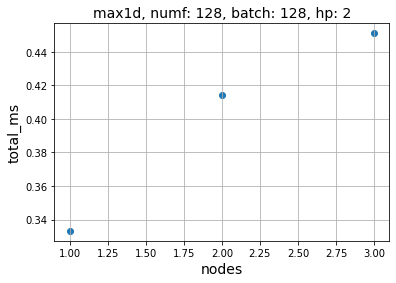

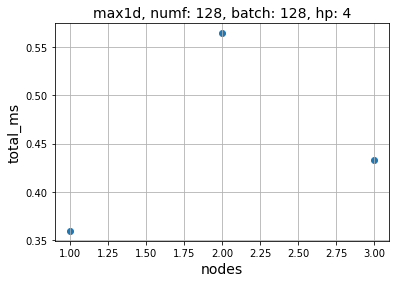

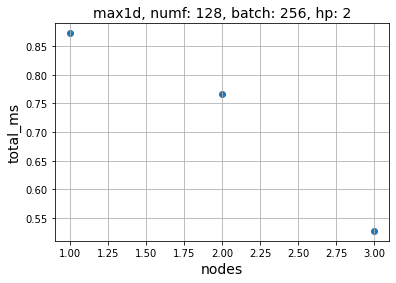

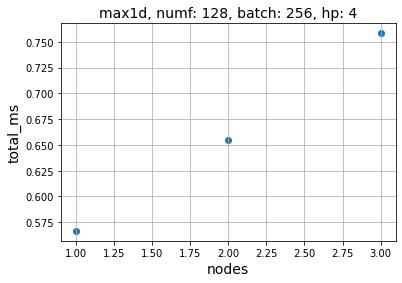

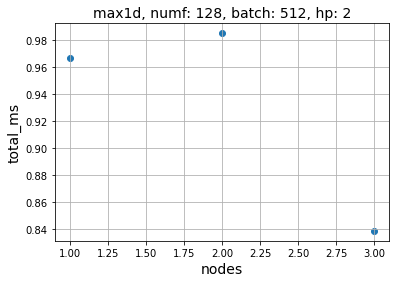

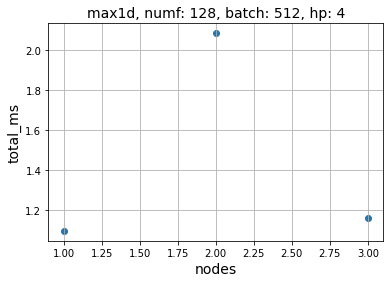

In [14]:
plot_nodes(tor, 'max1d')

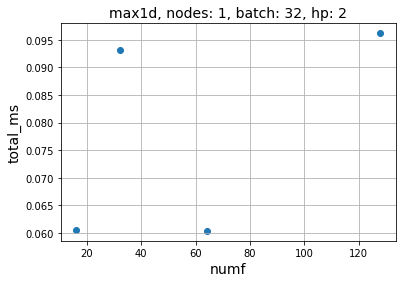

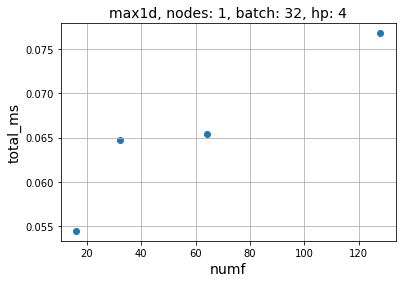

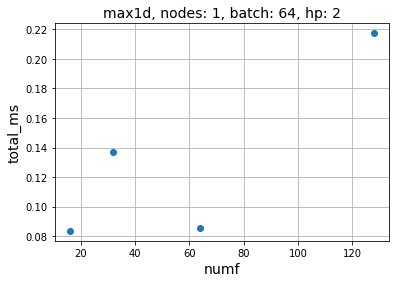

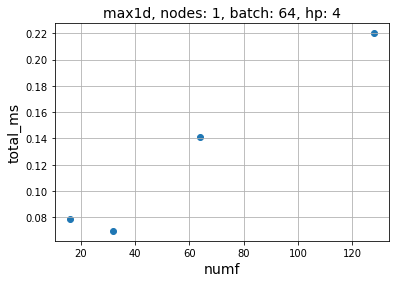

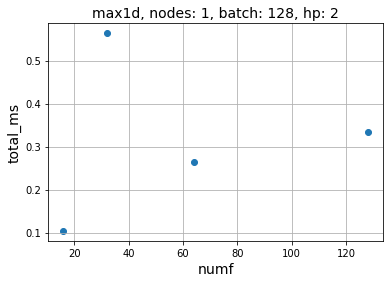

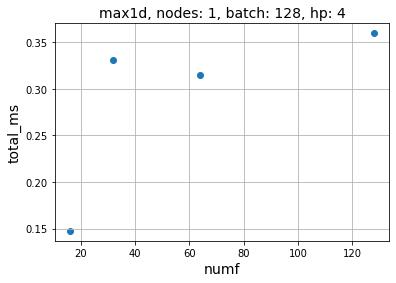

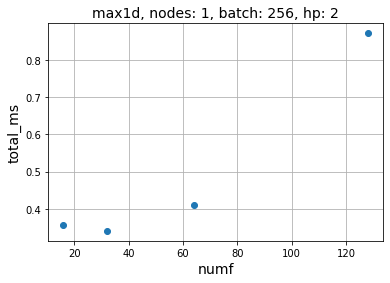

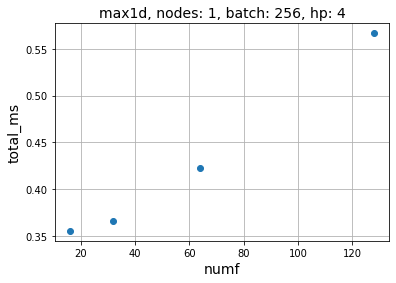

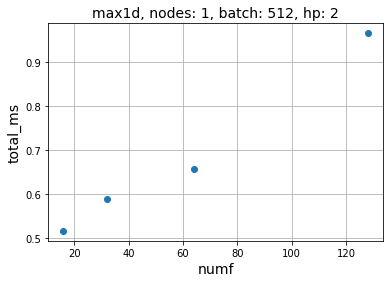

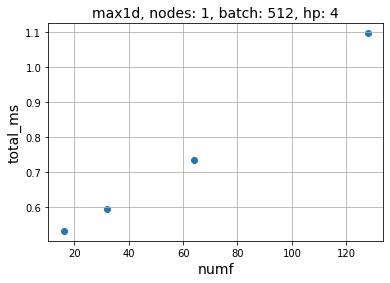

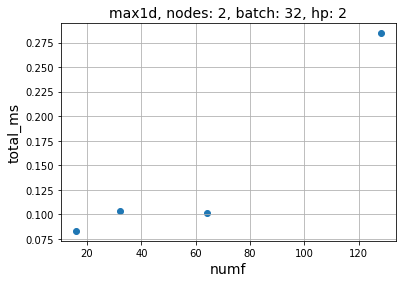

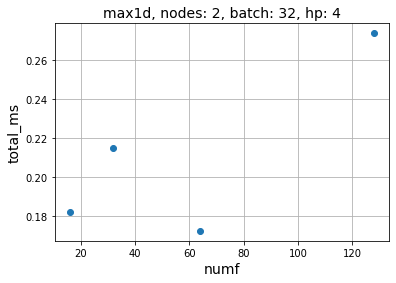

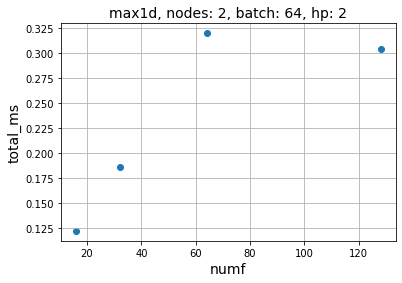

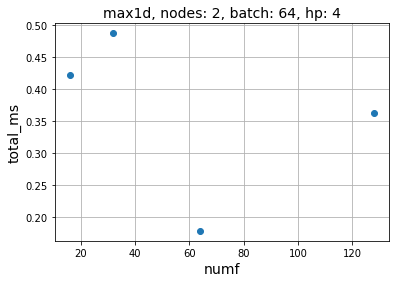

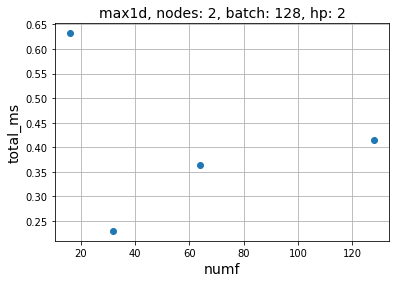

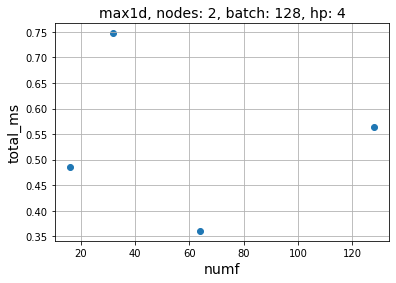

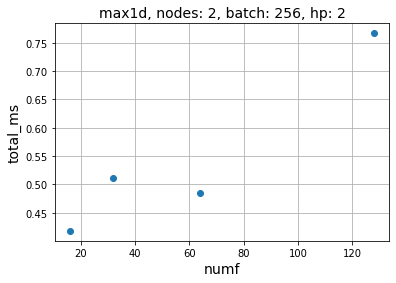

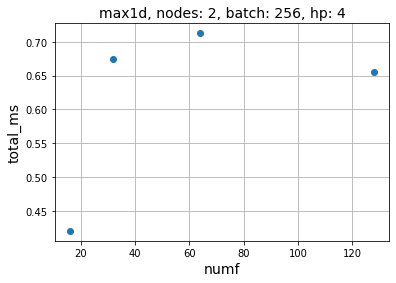

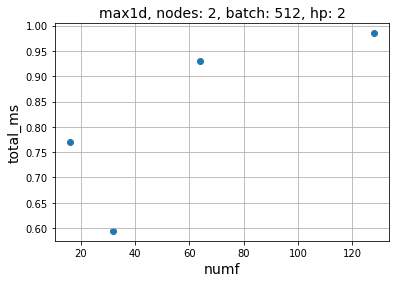

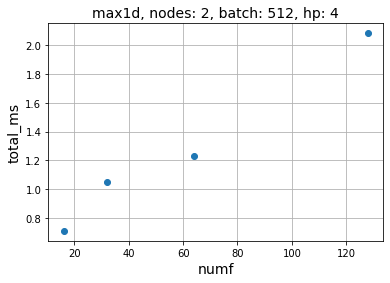

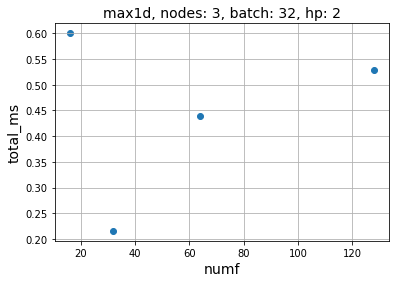

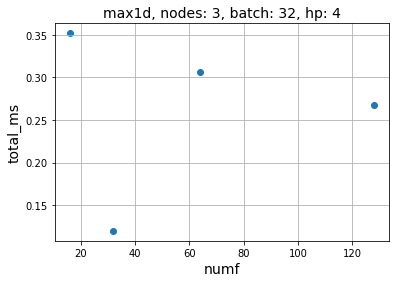

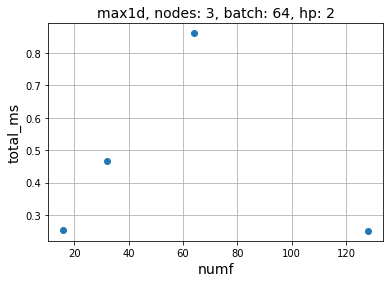

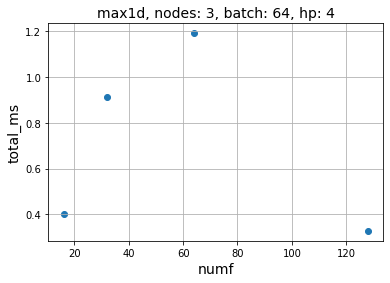

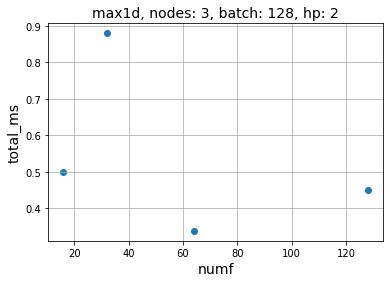

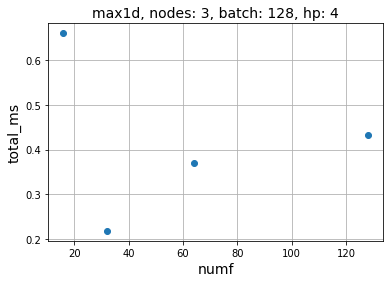

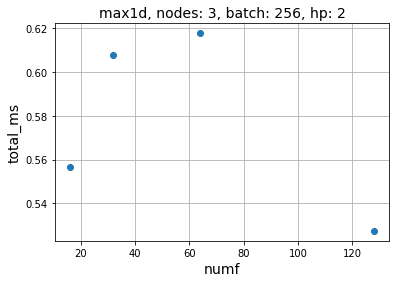

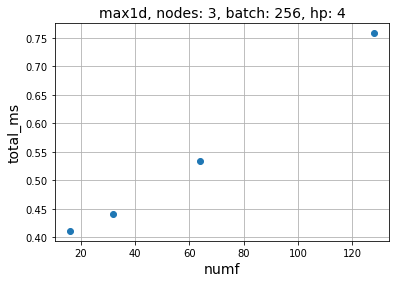

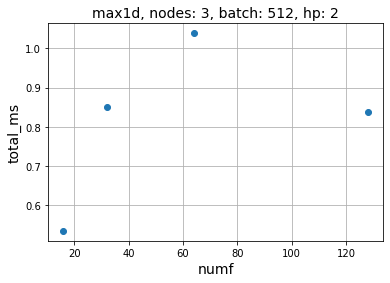

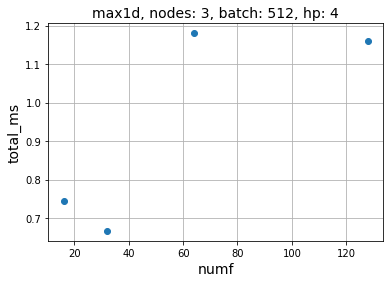

In [15]:
plot_numf(tor, 'max1d')

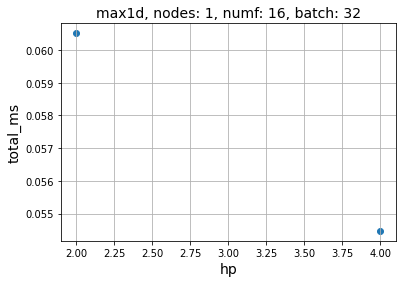

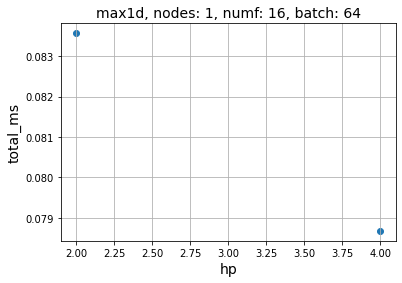

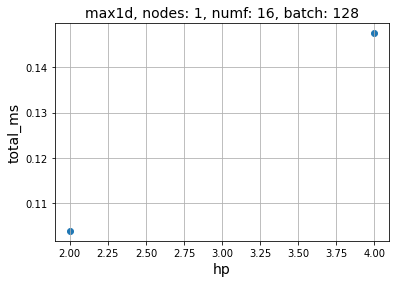

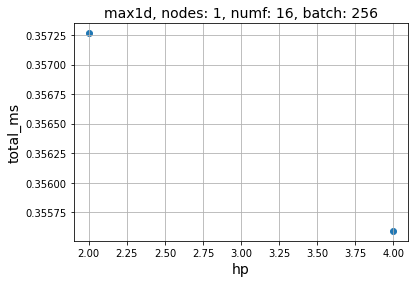

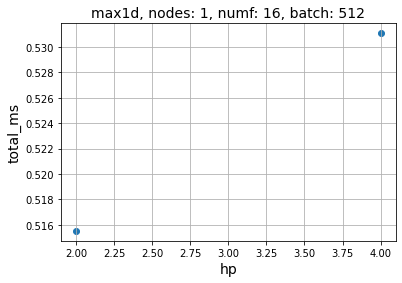

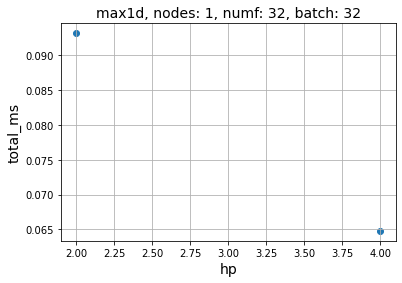

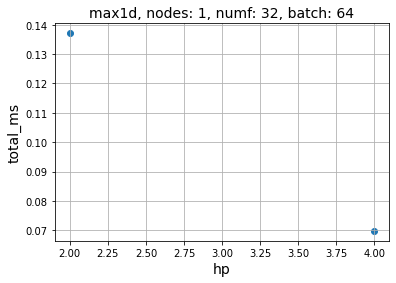

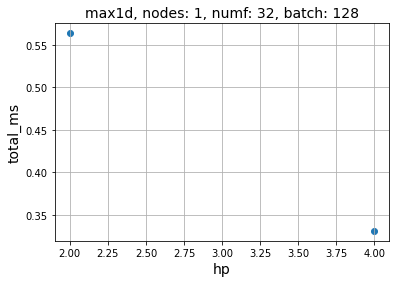

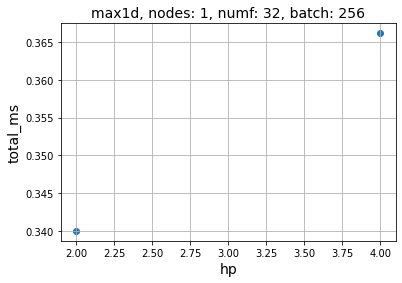

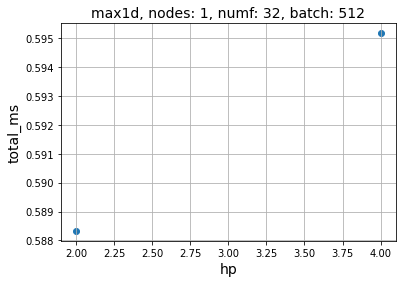

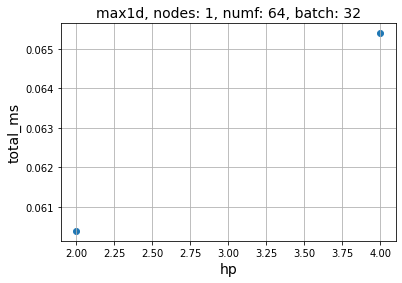

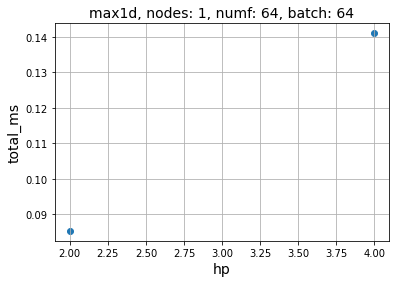

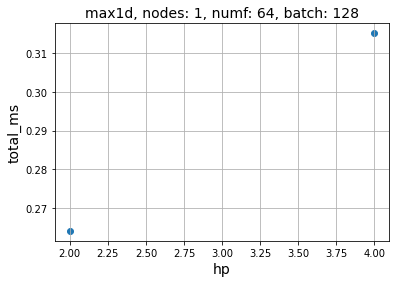

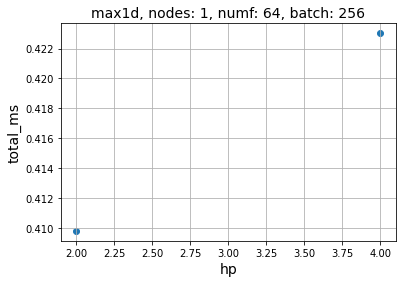

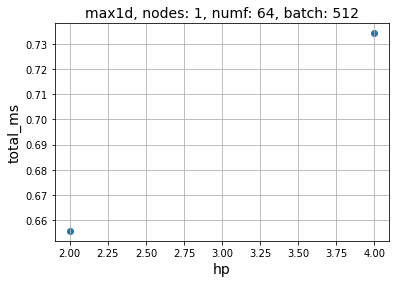

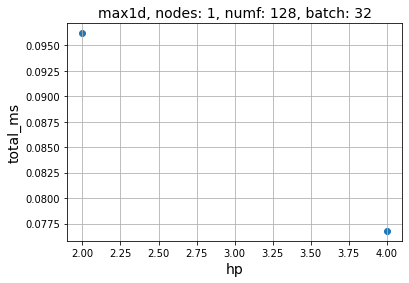

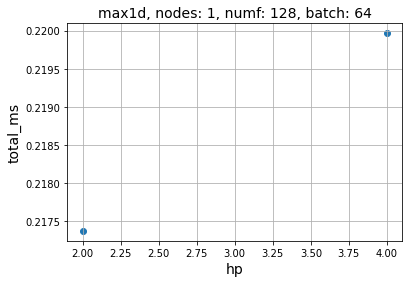

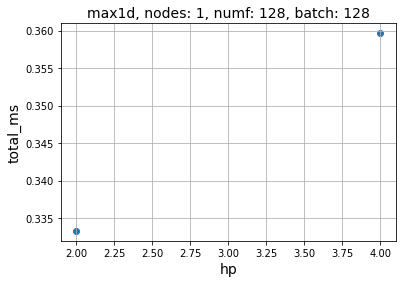

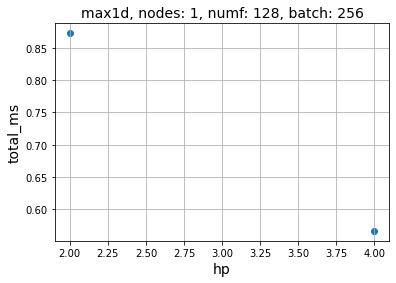

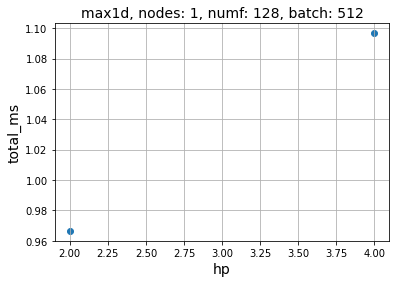

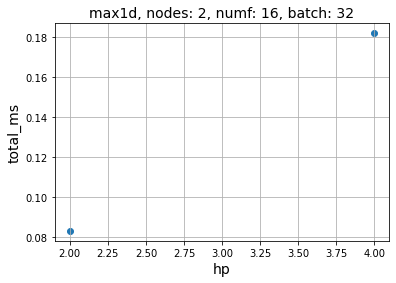

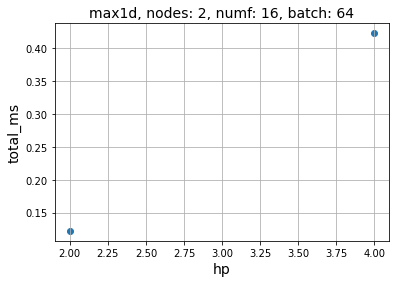

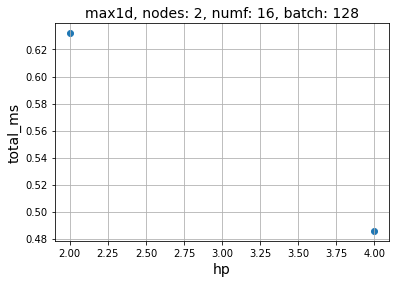

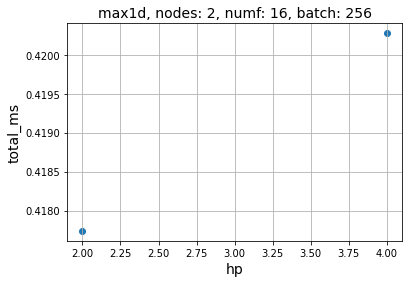

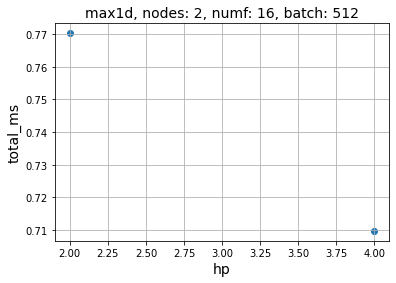

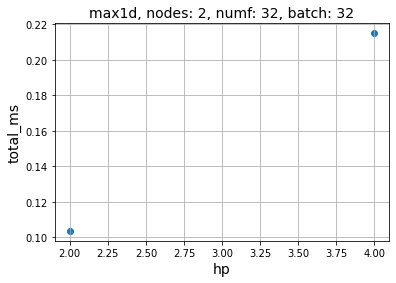

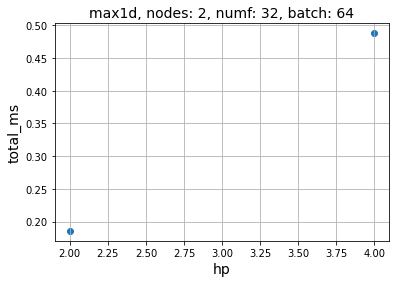

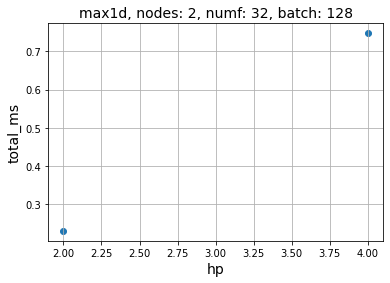

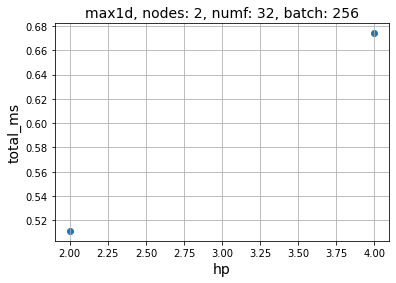

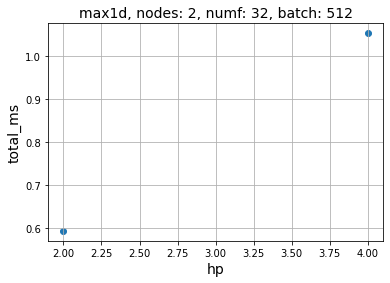

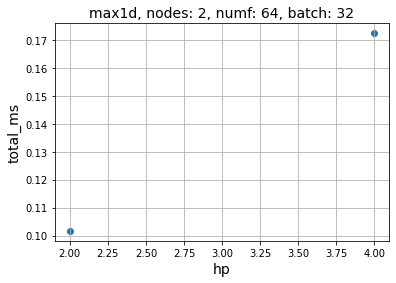

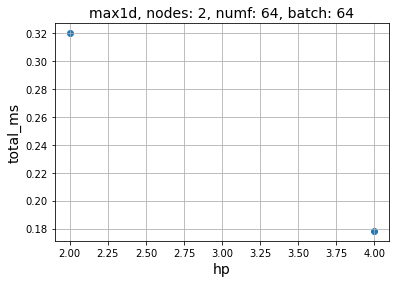

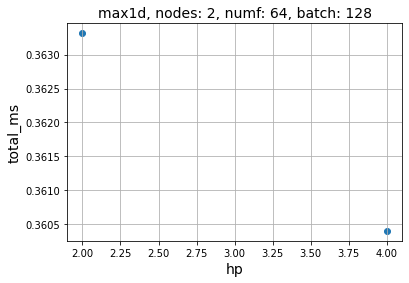

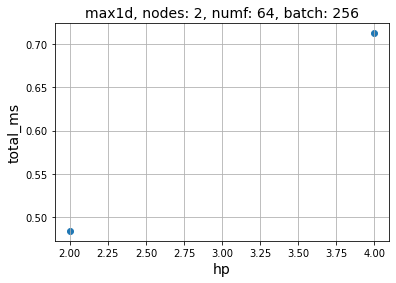

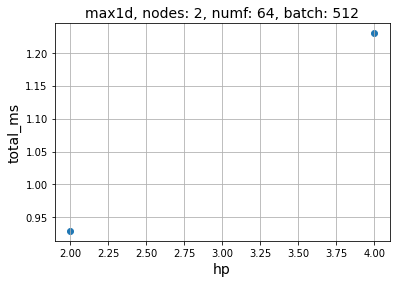

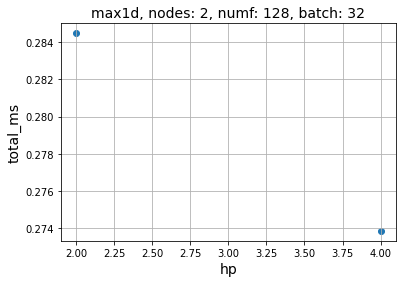

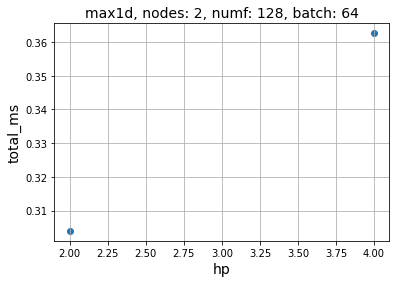

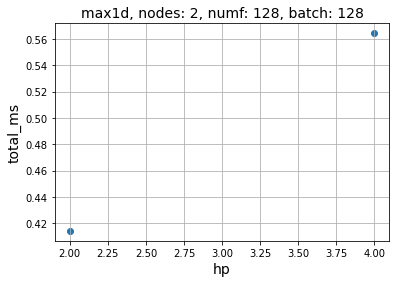

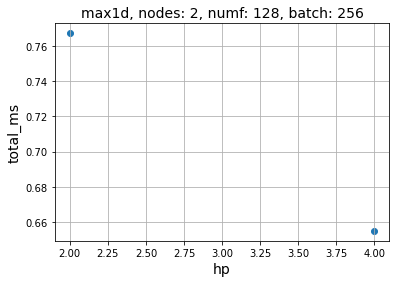

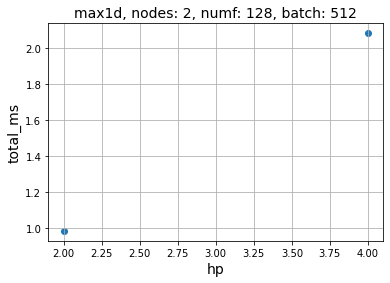

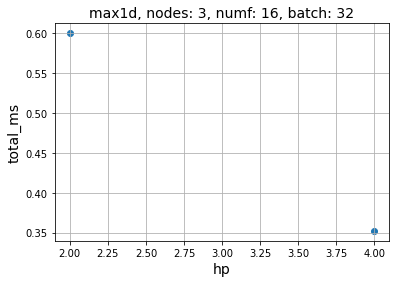

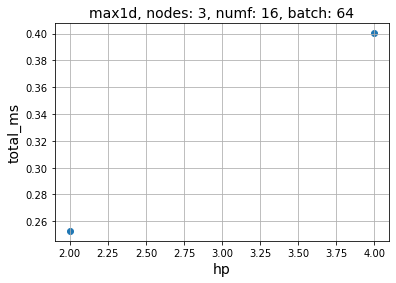

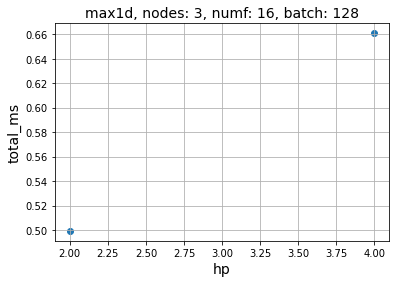

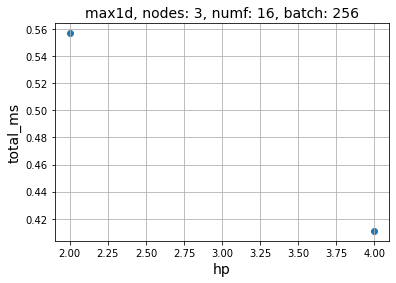

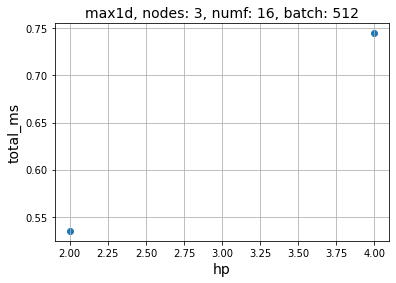

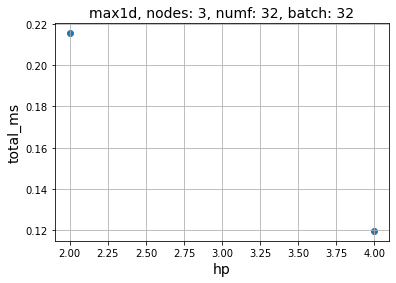

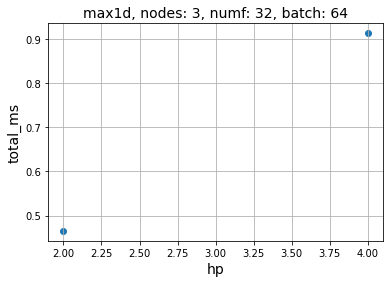

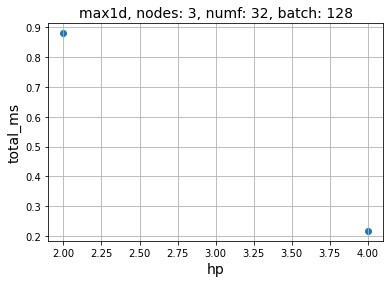

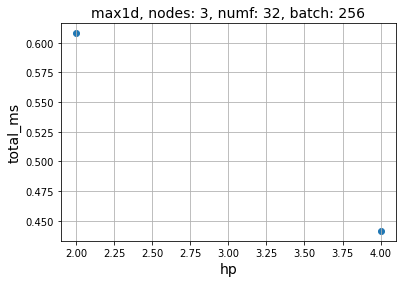

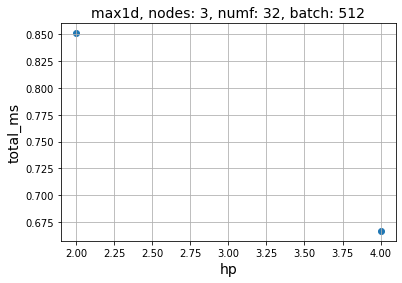

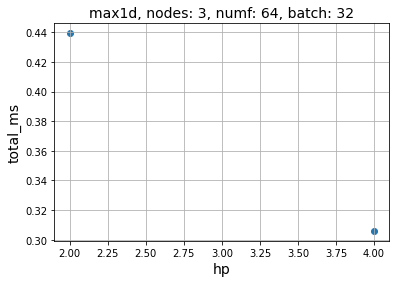

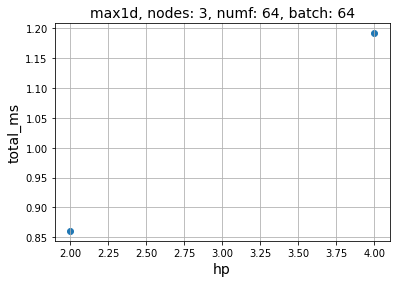

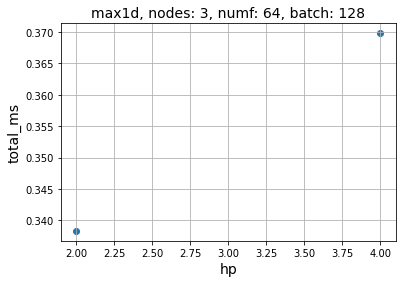

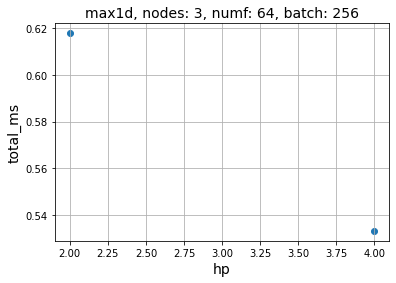

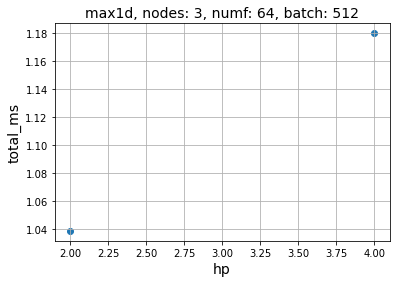

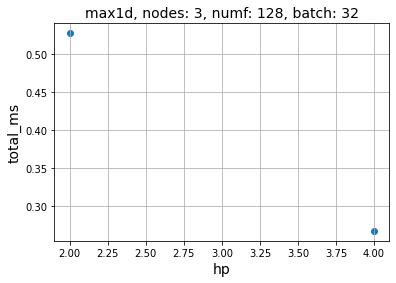

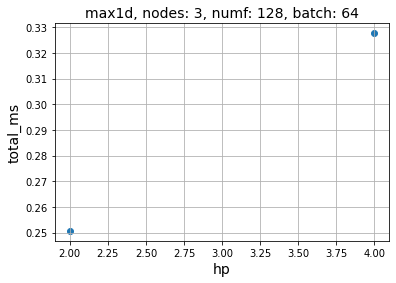

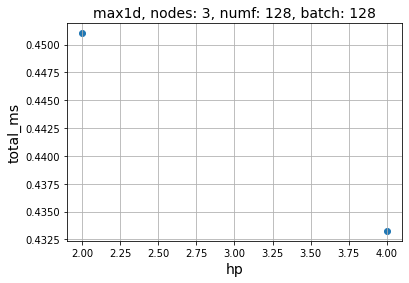

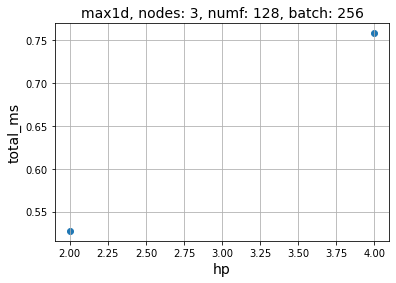

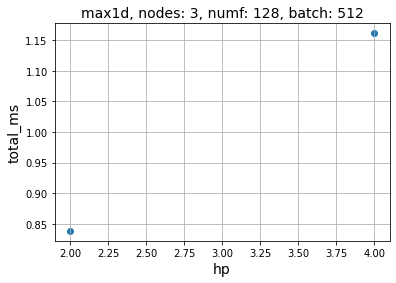

In [16]:
plot_hp(tor, 'max1d')

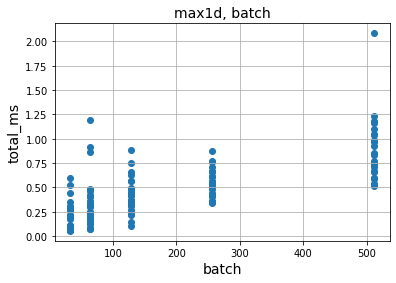

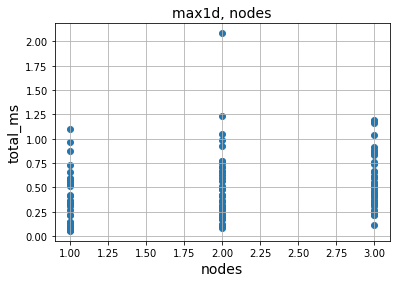

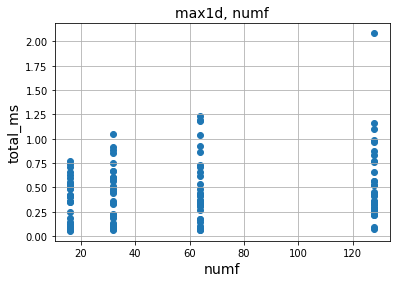

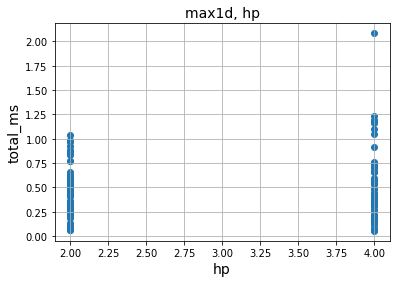

In [17]:
plot(tor, 'max1d', 'batch')
plot(tor, 'max1d', 'nodes')
plot(tor, 'max1d', 'numf')
plot(tor, 'max1d', 'hp')

In [18]:
tor = pd.concat([load(big_file(num, 'torch')) for num in [1,2,3]], ignore_index=True)

_all(tor)

Model: LinearRegression(), Layer: conv1d, Score: 0.14597624714878854

Model: LinearRegression(), Layer: conv2d, Score: 0.2817024107701914

Model: LinearRegression(), Layer: avg1d, Score: 0.8001910109165916

Model: LinearRegression(), Layer: avg2d, Score: 0.6527923081578368

Model: LinearRegression(), Layer: max1d, Score: 0.8531889601543609

Model: LinearRegression(), Layer: max2d, Score: 0.5528392481302953

Model: LinearRegression(), Layer: dense, Score: 0.6905793708468

Model: LinearRegression(), Layer: norm1d, Score: 0.859305645868675

Model: LinearRegression(), Layer: norm2d, Score: 0.6154741000236481

---

Model: Ridge(), Layer: conv1d, Score: 0.7174413690490633

Model: Ridge(), Layer: conv2d, Score: 0.545385569777461

Model: Ridge(), Layer: avg1d, Score: 0.050962059096967605

Model: Ridge(), Layer: avg2d, Score: 0.5267616674307232

Model: Ridge(), Layer: max1d, Score: 0.8588766422872576

Model: Ridge(), Layer: max2d, Score: 0.6122812899944766

Model: Ridge(), Layer: dense, Score: 